## Jia Lin Gao FYP Demo 2020

Loading Semantic Segmentation Model

In [1]:
from fastai.vision import *
from fastai.callbacks.hooks import *
from fastai.utils.mem import *
import os
from torchvision import transforms
from PIL import Image
import PIL
import matplotlib.pyplot as plt
import numpy as np
from torchvision import utils
import torch
import pandas as pd
path = os.getcwd()
import requests
from io import BytesIO
img_path = path+'/data/h5'
path_img = img_path+'/img_wmasks'

In [2]:
codes = array(['Background' , 'Building'])
name2id = {v:k for k,v in enumerate(codes)}
void_code = name2id['Background']

def acc_camvid(input, target):
    target = target.squeeze(1)
    mask = target != void_code
    return (input.argmax(dim=1)[mask]==target[mask]).float().mean()

metrics=acc_camvid
wd=1e-2

learn = load_learner(path_img)

Run ESRGAN

In [3]:
lr_path = '/projects/qg35/jlgao2/BasicSR/datasets/demo'
img_url = "https://i.imgur.com/sUKdcPj.png"

response = requests.get(img_url)
img = Image.open(BytesIO(response.content))
img.save(lr_path+'/demo.png')

In [4]:
!python ../BasicSR/basicsr/test.py -opt ../BasicSR/options/test/ESRGAN/demo.yml
path_demo=("../BasicSR/results/George FYP Demo/visualization/Sample")
hr_img = Image.open(path_demo+"/demo__result.png")


Disable distributed testing.
Path already exists. Rename it to /projects/qg35/jlgao2/BasicSR/results/George FYP Demo_archived_20201107_163022
2020-11-07 16:30:22,315 INFO: 
                ____                _       _____  ____
               / __ ) ____ _ _____ (_)_____/ ___/ / __ \
              / __  |/ __ `// ___// // ___/\__ \ / /_/ /
             / /_/ // /_/ /(__  )/ // /__ ___/ // _, _/
            /_____/ \__,_//____//_/ \___//____//_/ |_|
     ______                   __   __                 __      __
    / ____/____   ____   ____/ /  / /   __  __ _____ / /__   / /
   / / __ / __ \ / __ \ / __  /  / /   / / / // ___// //_/  / /
  / /_/ // /_/ // /_/ // /_/ /  / /___/ /_/ // /__ / /<    /_/
  \____/ \____/ \____/ \____/  /_____/\____/ \___//_/|_|  (_)
    
Version Information: 
	BasicSR: 1.0.1+2ae16da
	PyTorch: 1.6.0+cu101
	TorchVision: 0.7.0+cu101
	MMCV: 1.1.1
2020-11-07 16:30:22,316 INFO: 
  name: George FYP Demo
  model_type: ESRGANModel
  scale: 4
  num_gpu: 1
  manual_s

2020-11-07 16:30:26,380 INFO: Model [ESRGANModel] is created.
2020-11-07 16:30:26,381 INFO: Testing Sample...
[                              ] 0/1, elapsed: 0s, ETA:
Start...
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 1/1, 1.8 task/s, elapsed: 1s, ETA:     0s
Test demo


Text(0.5, 1.0, 'HR Img')

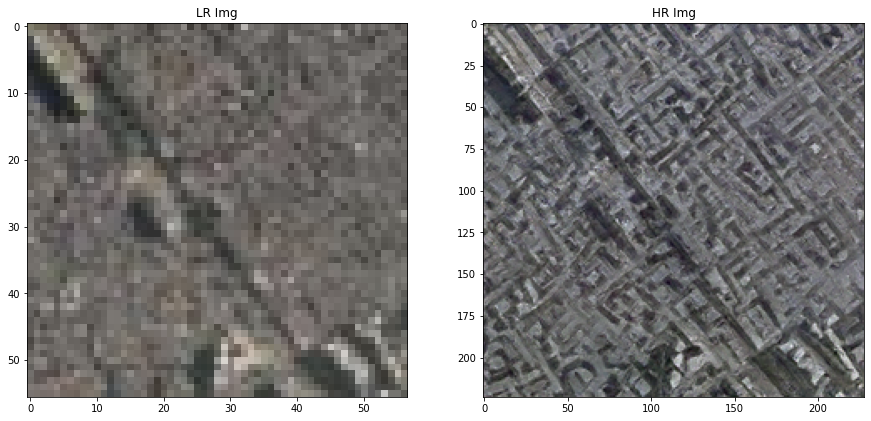

In [5]:
f, ((ax1, ax2)), = plt.subplots(1, 2, figsize=(15,10))

ax1.imshow(img)
ax1.set_title('LR Img')
ax2.imshow(hr_img)
ax2.set_title('HR Img')

Run Semantic Segmentation Model

Text(0.5, 1.0, 'HR Image')

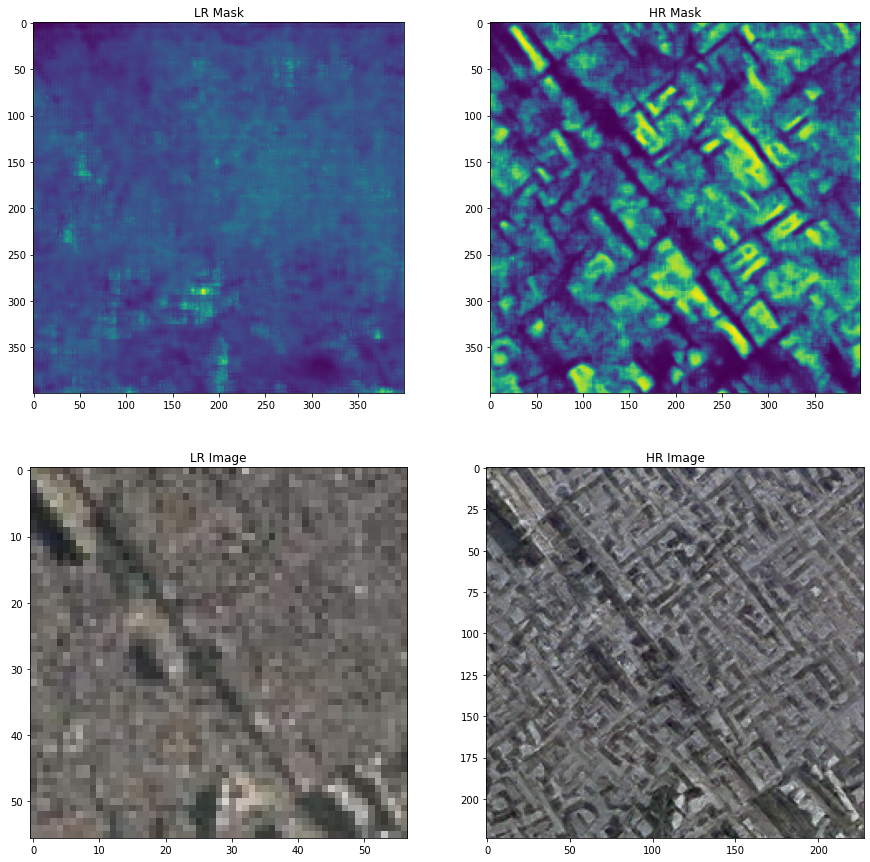

In [6]:
il_hr = ImageList.from_folder(path_demo)
il_lr = ImageList.from_folder(lr_path)
hr_msk = learn.predict(il_hr[0])[2][1]
lr_msk = learn.predict(il_lr[0])[2][1]

f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15,15))


ax1.imshow(lr_msk)
ax1.set_title('LR Mask')
ax2.imshow(hr_msk)
ax2.set_title('HR Mask')
ax3.imshow(img)
ax3.set_title('LR Image')
ax4.imshow(hr_img)
ax4.set_title('HR Image')
